In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [50]:
games = pd.read_parquet("hf://datasets/FronkonGames/steam-games-dataset/data/train-00000-of-00001-e2ed184370a06932.parquet")
recommendations = pd.read_csv("/Users/derricknguyen69/Downloads/recommendations.csv")

In [51]:
games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",None,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [52]:
recommendations.head(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


## Data Preprocessing

In [53]:
# Drop columns that are not useful
games = games.drop(columns = ['Reviews', 'Support email', 'Support url', 'Metacritic url', 'Header image', 'Website', 'Score rank', 'Notes', 'Publishers', 'Screenshots', 'Movies'])

In [54]:
games_descriptions = [
    'AppID, unique identifier for each app (string).',
    'Game name (string).',
    'Release date (string).',
    'Estimated owners (string, e.g.: "0 - 20000").',
    'Number of concurrent users, yesterday (int).',
    'Age required to play, 0 if it is for all audiences (int).',
    'Price in USD, 0.0 if it is free (float).',
    'Number of DLCs, 0 if you have none (int).',
    'Detailed description of the game (string).',
    'Comma-separated enumeration of supporting languages.',
    'Comma-separated enumeration of languages with audio support.',
    'Does it support Windows? (bool).',
    'Does it support Mac? (bool).',
    'Does it support Linux? (bool).',
    'Metacritic score, 0 if it has none (int).',
    'Users score, 0 if it has none (int).',
    'Positive votes (int).',
    'Negative votes (int).',
    'Number of achievements, 0 if it has none (int).',
    'User recommendations, 0 if it has none (int).',
    'Average playtime since March 2009, in minutes (int).',
    'Average playtime in the last two weeks, in minutes (int).',
    'Median playtime since March 2009, in minutes (int).',
    'Median playtime in the last two weeks, in minutes (int).',
    'Developer name (string).',
    'Game categories.',
    'Game genres.',
    'Tags.'
]

recommendations_descriptions = [
    'Native product ID on Steam.',
    'How many users found a recommendation helpful',
    'How many users found a recommendation funny',
    'Date of publishing',
    'Is the user recommending the product?',
    'How may hours played by user',
    'User anonymized ID',
    'Autogenerated ID'
]


games_info_table = pd.DataFrame({
    "Data Type": games.dtypes,
    "Null Count": games.isna().sum(),
    'Description': games_descriptions
})

recommendations_info_table = pd.DataFrame({
    "Data Type": recommendations.dtypes,
    "Null Count": recommendations.isna().sum(),
    'Description': recommendations_descriptions
})


In [55]:
# Column descriptions for games df
games_info_table

,Data Type,Null Count,Description
AppID,int64,0,"AppID, unique identifier for each app (string)."
Name,object,6,Game name (string).
Release date,object,0,Release date (string).
Estimated owners,object,0,"Estimated owners (string, e.g.: ""0 - 20000"")."
Peak CCU,int64,0,"Number of concurrent users, yesterday (int)."
Required age,int64,0,"Age required to play, 0 if it is for all audie..."
Price,float64,0,"Price in USD, 0.0 if it is free (float)."
DLC count,int64,0,"Number of DLCs, 0 if you have none (int)."
About the game,object,3437,Detailed description of the game (string).
Supported languages,object,0,Comma-separated enumeration of supporting lang...


In [56]:
# Column descriptions for user recommendations df
recommendations_info_table

,Data Type,Null Count,Description
app_id,int64,0,Native product ID on Steam.
helpful,int64,0,How many users found a recommendation helpful
funny,int64,0,How many users found a recommendation funny
date,object,0,Date of publishing
is_recommended,bool,0,Is the user recommending the product?
hours,float64,0,How may hours played by user
user_id,int64,0,User anonymized ID
review_id,int64,0,Autogenerated ID


In [57]:
# number of observations for games
games.shape

(83560, 28)

In [58]:
# number of observations for recommendations
recommendations.shape

(41154794, 8)

In [59]:
# Number of null values in games
games.isna().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3437
Supported languages               0
Full audio languages              0
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
User score                        0
Positive                          0
Negative                          0
Achievements                      0
Recommendations                   0
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks         0
Developers                     3457
Categories                     4456
Genres                         3425
Tags                        

In [60]:
# Number of null values in recommendations
recommendations.isna().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [61]:
# Drop rows with missing values in the 'About the game' column
games.dropna(subset=['About the game'], inplace=True)

In [62]:
# Variable types of games
games.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
Developers                     object
Categories                     object
Genres      

In [63]:
# Variable types of recommendations
recommendations.dtypes

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object

In [64]:
# Convert the 'Release date' column to datetime
games['Release date'] = pd.to_datetime(games['Release date'], errors='coerce')

In [65]:
# Check unique values for each column in games
for i in games.columns:
    print(f'{i}: {games[i].unique()}')

AppID: [  20200  655370 1732930 ... 2308790 2669970 2530730]
Name: ['Galactic Bowling' 'Train Bandit' 'Jolt Project' ... 'UNDRESS!' 'Oculant'
 'Hentai Abigail']
Release date: <DatetimeArray>
['2008-10-21 00:00:00', '2017-10-12 00:00:00', '2021-11-17 00:00:00',
 '2020-07-23 00:00:00', '2020-02-03 00:00:00', '2021-02-26 00:00:00',
 '2022-01-09 00:00:00', '2022-05-05 00:00:00', '2020-04-02 00:00:00',
 '2014-11-11 00:00:00',
 ...
 '2023-11-06 00:00:00', '2023-10-28 00:00:00', '2023-09-30 00:00:00',
 '2023-10-01 00:00:00', '2023-11-29 00:00:00', '2023-10-08 00:00:00',
 '2023-09-10 00:00:00', '2023-09-03 00:00:00', '2023-11-26 00:00:00',
 '2023-09-17 00:00:00']
Length: 4354, dtype: datetime64[ns]
Estimated owners: ['0 - 20000' '50000 - 100000' '20000 - 50000' '200000 - 500000'
 '100000 - 200000' '2000000 - 5000000' '0 - 0' '500000 - 1000000'
 '1000000 - 2000000' '20000000 - 50000000' '5000000 - 10000000'
 '10000000 - 20000000' '50000000 - 100000000' '100000000 - 200000000']
Peak CCU: [   0  

In [66]:
# Check unique values for each column in recommendations
for i in recommendations.columns:
    print(f'{i}: {recommendations[i].unique()}')

app_id: [ 975370  304390 1085660 ... 1246250  510540 1643850]
helpful: [    0     4     2 ... 11577  5442  2277]
funny: [   0    4    2 ... 2548 2381 2035]
date: ['2022-12-12' '2017-02-17' '2019-11-17' ... '2010-10-24' '2010-11-16'
 '2010-11-04']
is_recommended: [ True False]
hours: [  36.3   11.5  336.5 ...  951.   871.4 1000. ]
user_id: [  51580    2586  253880 ... 5020742  492792 2306695]
review_id: [       0        1        2 ... 41154791 41154792 41154793]


In [67]:
# Distribution of numerical columns excluding 'AppID' in recommendations
recommendations.drop(columns=['app_id']).describe()

,helpful,funny,hours,user_id,review_id
count,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07,4.115479e+07
mean,3.202567e+00,1.058071e+00,1.006022e+02,7.450576e+06,2.057740e+07
std,4.693649e+01,2.867060e+01,1.761675e+02,4.010685e+06,1.188037e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,7.800000e+00,4.287256e+06,1.028870e+07
50%,0.000000e+00,0.000000e+00,2.730000e+01,7.546446e+06,2.057740e+07
75%,0.000000e+00,0.000000e+00,9.920000e+01,1.096877e+07,3.086609e+07
max,3.621200e+04,2.810900e+04,1.000000e+03,1.430606e+07,4.115479e+07


In [ ]:
games.describe()

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Categories', 'Genres',
       'Tags'],
      dtype='object')

In [69]:
# Distribution of numerical columns excluding 'AppID'
games.drop(columns=['AppID']).describe()

,Release date,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,79994,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,8.012300e+04,80123.000000,80123.000000,80123.000000,80123.000000
mean,2020-02-29 20:10:44.088306688,141.266902,0.329106,7.492690,0.574404,3.546260,0.042297,1.016005e+03,169.071840,20.892690,8.214880e+02,110.981416,11.305630,98.980205,12.149246
min,1997-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2018-05-08 00:00:00,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2020-10-04 00:00:00,0.000000,0.000000,4.990000,0.000000,0.000000,0.000000,8.000000e+00,2.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,2022-06-21 00:00:00,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,5.200000e+01,16.000000,19.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2025-04-14 00:00:00,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000
std,NaN,5562.178454,2.311517,12.476732,14.139916,15.848217,1.845806,2.510164e+04,4713.395668,176.617204,1.843653e+04,1176.662920,194.539268,1556.758920,211.606178


In [70]:
recommendations.columns

Index(['app_id', 'helpful', 'funny', 'date', 'is_recommended', 'hours',
       'user_id', 'review_id'],
      dtype='object')

In [71]:
# Check for dulplicate rows
games_str = games.map(lambda x: str(x) if isinstance(x, list) else x)

games_duplicate_rows = games_str[games_str.duplicated()]
print(f"Number of duplicate rows for games: {games_duplicate_rows.shape[0]}")

Number of duplicate rows for games: 0


In [97]:
user_counts = recommendations['user_id'].value_counts()

# Get the top 100,000 users with the most rows
top_users = user_counts.head(100000).index

# Filter the dataset to only include data for the top 100,000 users
sample_recs = recommendations[recommendations['user_id'].isin(top_users)]

In [98]:
merged_df = sample_recs.merge(games, left_on='app_id', right_on='AppID', how='inner')

## Data Exploration

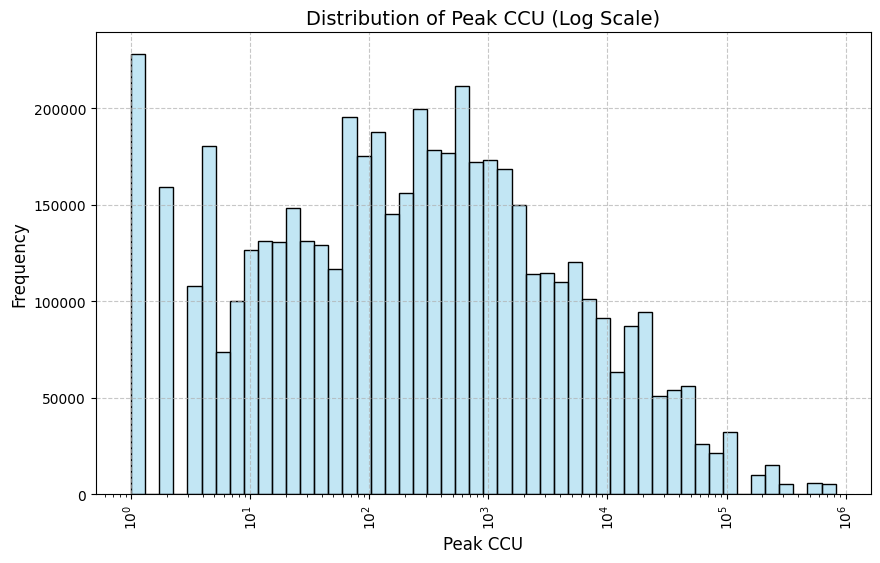

In [100]:
import warnings
warnings.filterwarnings('ignore')

# 1. Histogram of Estimated Owners
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Peak CCU'], log_scale=True, kde=True, color='skyblue', bins=50, line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel("Peak CCU", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Peak CCU (Log Scale)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

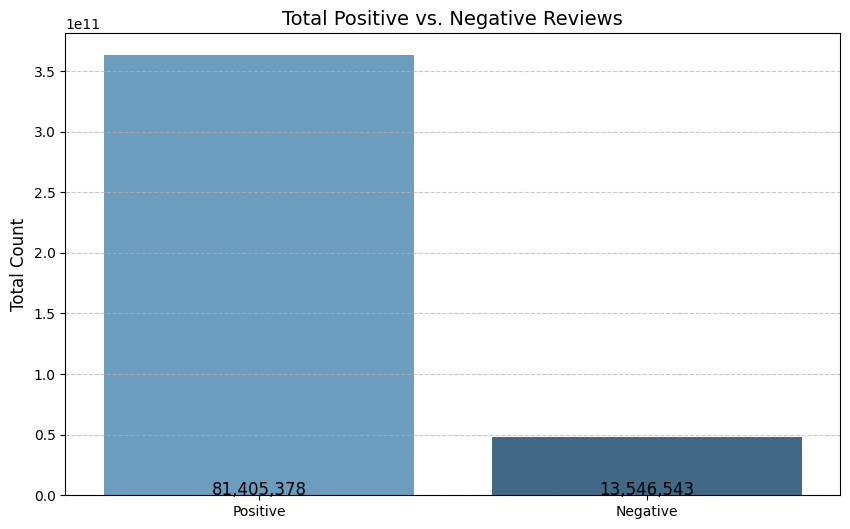

In [101]:
# 2. Bar chart of Positive vs. Negative Reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=['Positive', 'Negative'], y=[merged_df['Positive'].sum(), merged_df['Negative'].sum()], hue=['Positive', 'Negative'], palette="Blues_d", dodge=False, legend=False)
plt.ylabel("Total Count", fontsize=12)
plt.title("Total Positive vs. Negative Reviews", fontsize=14)
for i, count in enumerate([games['Positive'].sum(), games['Negative'].sum()]):
    plt.text(i, count + 1000, f'{count:,}', ha='center', fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

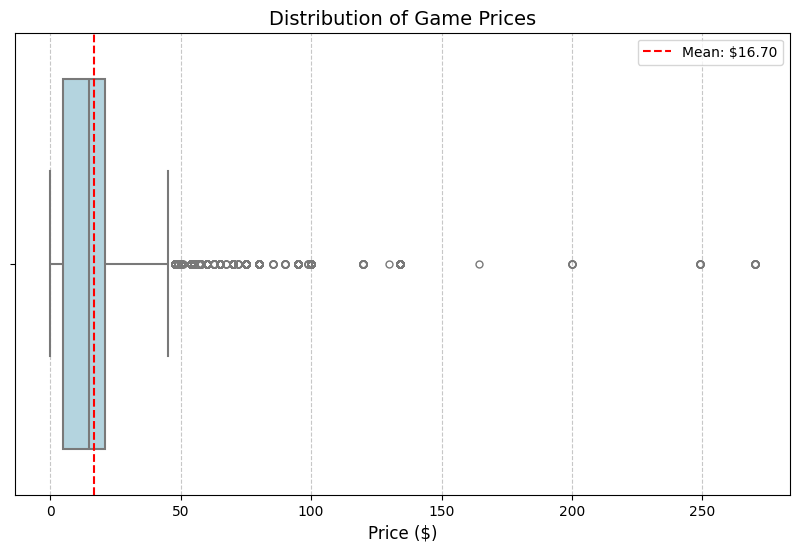

In [ ]:
# 3. Boxplot of Game Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Price'], color="lightblue", fliersize=5, linewidth=1.5)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
mean_price = merged_df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.xlabel("Price ($)", fontsize=12)
plt.title("Distribution of Game Prices", fontsize=14)
# plt.xlim(0, merged_df['Price'].quantile(0.95))
plt.legend()
plt.show()

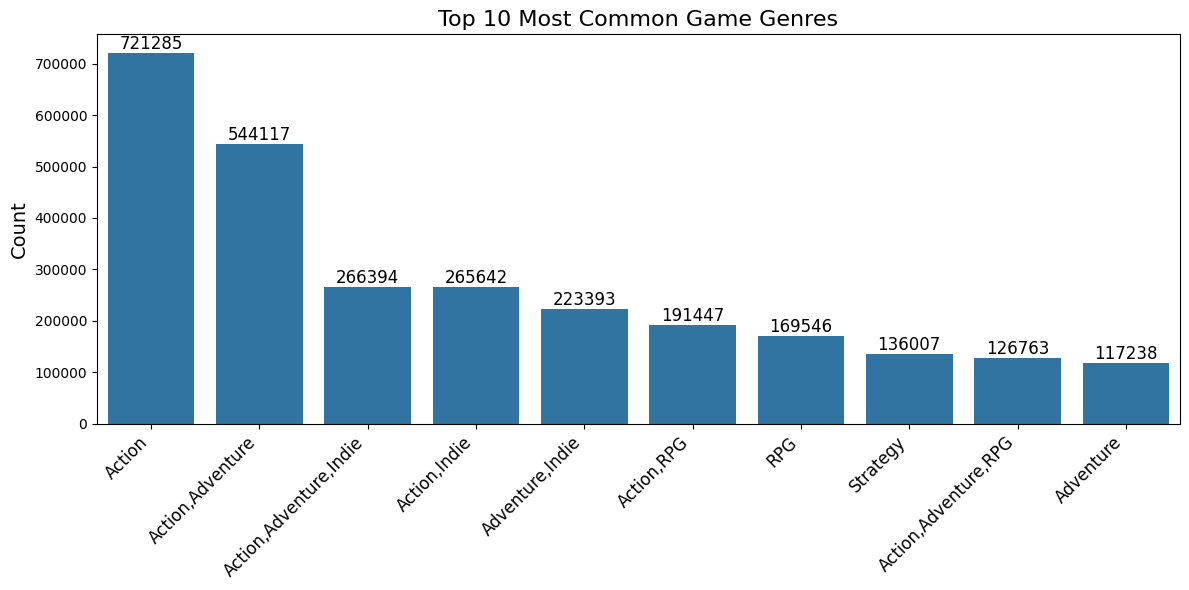

In [104]:
# 4. Top Genres Distribution
all_genres = [genre for sublist in merged_df['Genres'].dropna().str.split(';') for genre in sublist]
top_genres = dict(Counter(all_genres).most_common(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()))

for index, value in enumerate(top_genres.values()):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Count", fontsize=14)
plt.title("Top 10 Most Common Game Genres", fontsize=16)
plt.tight_layout()
plt.show()

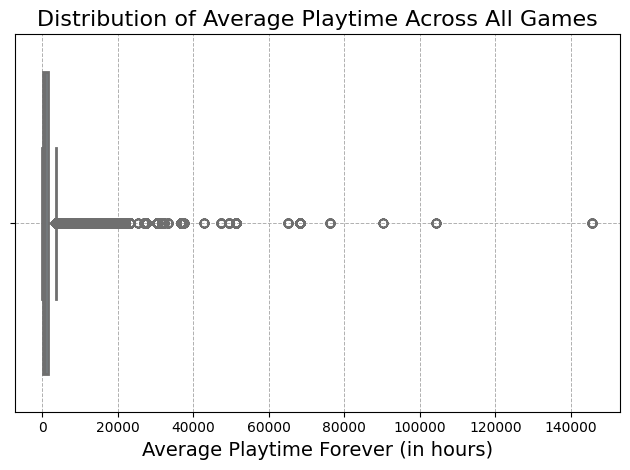

In [105]:
#5 Playtime Distributionplt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df["Average playtime forever"], color='skyblue', fliersize=6, linewidth=2)

plt.grid(True, linestyle='--', linewidth=0.7)
plt.title("Distribution of Average Playtime Across All Games", fontsize=16)
plt.xlabel("Average Playtime Forever (in hours)", fontsize=14)
plt.tight_layout()
plt.show()

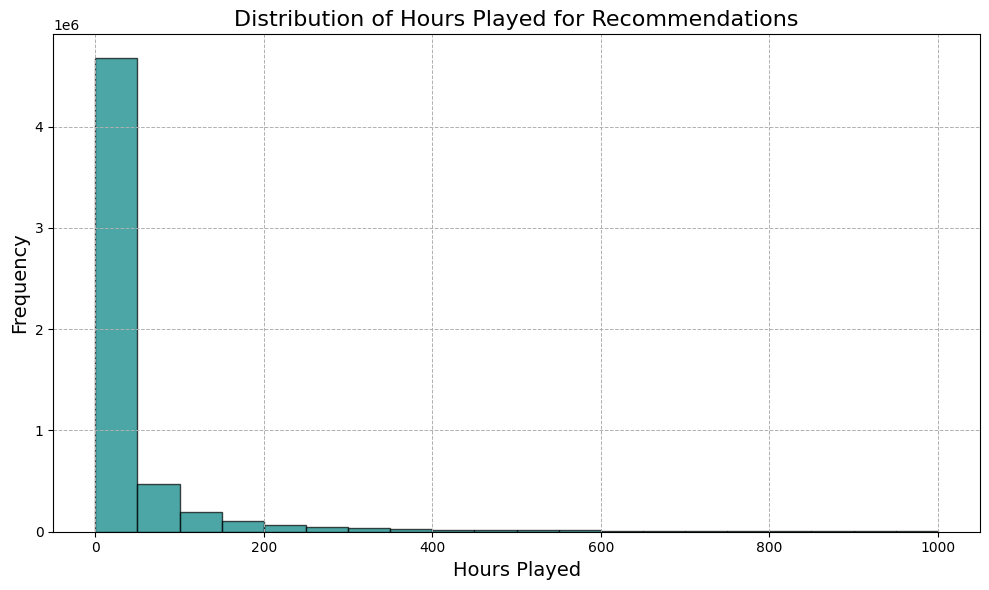

In [106]:
#6 Histogram of Hours Played for Recommendations
plt.figure(figsize=(10, 6))
plt.hist(merged_df['hours'], bins=20, color='teal', edgecolor='black', alpha=0.7)

plt.grid(True, linestyle='--', linewidth=0.7)
plt.title("Distribution of Hours Played for Recommendations", fontsize=16)
plt.xlabel("Hours Played", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

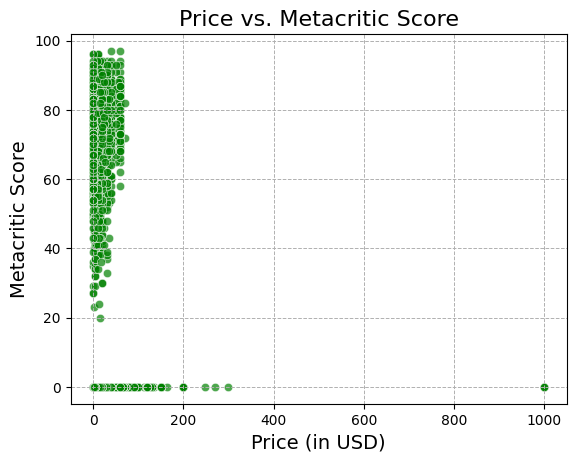

In [110]:
sns.scatterplot(x='Price', y='Metacritic score', data=games, color='green', alpha=0.7)
plt.title('Price vs. Metacritic Score', fontsize=16)
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Metacritic Score', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7)


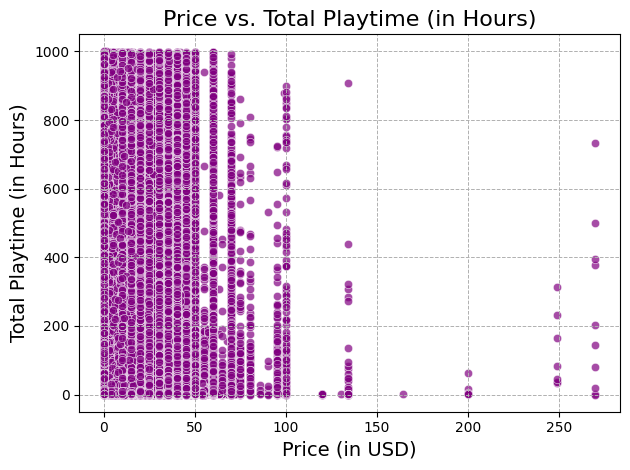

In [113]:
sns.scatterplot(x='Price', y='hours', data=merged_df, color='purple', alpha=0.7)

# Customize the title and axis labels
plt.title('Price vs. Total Playtime (in Hours)', fontsize=16)
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Total Playtime (in Hours)', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Agent #1

The recommendation dataset has over 4 million obervations which is too large to merge with the games data. Therefore, we resampled the data to only include data for the top 100,000 users as users with few recommendations will probably not constribute much to the model.

In [117]:
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Select relevant features
features = ["hours", "Genres", "Price", "is_recommended"]
df = merged_df[features]

# Encode categorical variables
label_enc = LabelEncoder()
df["Genres"] = label_enc.fit_transform(df["Genres"])
df["Price"] = pd.cut(df["Price"], bins=[0, 10, 30, 60, np.inf], labels=[0, 1, 2, 3]) 
df['hours'] = pd.qcut(df['hours'], q=4, labels=[0, 1, 2, 3])

df = df.dropna()

# Convert to numpy
X = df.drop(columns=["is_recommended"]).to_numpy()
y = df["is_recommended"].to_numpy()

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Hidden Markov Model
n_states = 4 
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000, random_state=42)

model.fit(X_train)

# Assign hidden states
hidden_states_train = model.predict(X_train)
hidden_states_test = model.predict(X_test)

# Add hidden states to dataframe
df_train = pd.DataFrame(X_train, columns=["hours", "Genres", "Price"])
df_train["hidden_state"] = hidden_states_train
df_train["is_recommended"] = y_train

df_test = pd.DataFrame(X_test, columns=["hours", "Genres", "Price"])
df_test["hidden_state"] = hidden_states_test
df_test["is_recommended"] = y_test

# Select 1000 random users from the test set as the full user set is too costly in time 
np.random.seed(42)
random_indices = np.random.choice(len(X_test), 1000, replace=False)

def recommend_game(user_data):
    state = model.predict(user_data.reshape(1, -1))
    recommended_games = df_train[df_train["hidden_state"] == state[0]]
    return recommended_games.sample(min(5, len(recommended_games)))  

def evaluate_recommendations(model, X_test, y_test, random_indices,):
    y_true = []
    y_pred = []

    # Evaluate recommendations
    for user_data, actual_recommendation in zip(X_test[random_indices], y_test[random_indices]):
        recommendations = recommend_game(user_data)

        # Check if any recommended game matches the test set actual recommendation
        predicted = 1 if actual_recommendation in recommendations["is_recommended"].values else 0
        y_true.append(1 if actual_recommendation == 1 else 0)
        y_pred.append(predicted)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return accuracy, precision, recall, f1

# Now you can call the function to evaluate
accuracy, precision, recall, f1 = evaluate_recommendations(model, X_test, y_test, random_indices)

print(f"Tested on 1000 users")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Tested on 1000 users
Accuracy: 0.8850
Precision: 0.8780
Recall: 1.0000
F1 Score: 0.9351


### Fitting Graph

In [62]:
n_components_range = [2, 3, 4, 5]  
accuracies_train = [] 
accuracies_test = []  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n_components in n_components_range:
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000, random_state=42)

    model.fit(X_train)

    # Assign hidden states for training and testing
    hidden_states_train = model.predict(X_train)
    hidden_states_test = model.predict(X_test)

    # Add hidden states to dataframe for training set
    df_train = pd.DataFrame(X_train, columns=["hours", "Genres", "Price"])
    df_train["hidden_state"] = hidden_states_train
    df_train["is_recommended"] = y_train
    
    # Add hidden states to dataframe for testing set
    df_test = pd.DataFrame(X_test, columns=["hours", "Genres", "Price"])
    df_test["hidden_state"] = hidden_states_test
    df_test["is_recommended"] = y_test

    # Select 10 random users from the test set as the full user set is too costly in time
    np.random.seed(42)
    random_indices_test = np.random.choice(len(X_test), 10, replace=False)
    random_indices_train = np.random.choice(len(X_train), 10, replace=False)

    accuracy_test, _, _, _ = evaluate_recommendations(model, X_test, y_test, random_indices_test)
    accuracy_train, _, _, _ = evaluate_recommendations(model, X_train, y_train, random_indices_train)

    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)

    print(f'Component {n_components} finished')




Component 2 finished
Component 3 finished
Component 4 finished
Component 5 finished


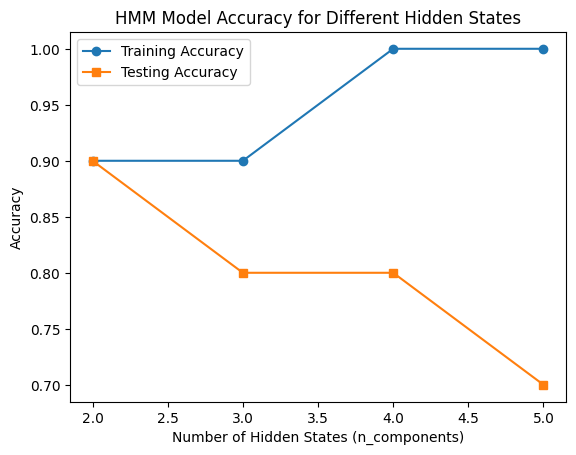

In [63]:
plt.plot(n_components_range, accuracies_train, marker='o', label="Training Accuracy")
plt.plot(n_components_range, accuracies_test, marker='s', label="Testing Accuracy")
plt.xlabel("Number of Hidden States (n_components)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("HMM Model Accuracy for Different Hidden States")
plt.show()


Since the training accuracy is higher than our testing accuracy, the model is overfitting to the data.

### CPT

In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 1. Calculate P(Genres | Is_Recommended)
genre_counts = merged_df.groupby(['is_recommended', 'Genres']).size().unstack(fill_value=0)

genre_probabilities = genre_counts.div(genre_counts.sum(axis=1), axis=0)

# 2. Calculate P(Price | Is_Recommended)
price_counts = df.groupby(['is_recommended', 'Price']).size().unstack(fill_value=0)

price_probabilities = price_counts.div(price_counts.sum(axis=1), axis=0)

# 3. Calculate P(Is_Recommended)
is_recommended_counts = df['is_recommended'].value_counts(normalize=True)

print("P(Genres | Is_Recommended):")
display(genre_probabilities)
print("\nP(Price | Is_Recommended):")
display(price_probabilities)
print("\nP(Is_Recommended):")
display(is_recommended_counts)

P(Genres | Is_Recommended):


Genres,"Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing","Accounting,Animation & Modeling,Audio Production,Design & Illustration,Education,Photo Editing,Software Training,Utilities,Video Production,Web Publishing,Game Development","Accounting,Education,Software Training,Utilities,Early Access",Action,"Action,Adventure","Action,Adventure,Casual","Action,Adventure,Casual,Early Access","Action,Adventure,Casual,Free to Play","Action,Adventure,Casual,Free to Play,Indie","Action,Adventure,Casual,Free to Play,Indie,Early Access",...,"Violent,Gore,Indie,Early Access","Violent,Gore,Indie,Massively Multiplayer,Early Access","Violent,Gore,Indie,Strategy","Violent,Gore,Simulation,Early Access","Violent,Gore,Utilities","Violent,Indie","Violent,RPG","Violent,RPG,Strategy","Violent,Sports",Web Publishing
is_recommended,,,,,,,,,,,,,,,,,,,,,
False,0.000002,0.000022,0.000000,0.107567,0.080693,0.004881,0.000002,0.000034,0.002092,0.000024,...,0.000005,0.000008,9.397428e-07,0.000000e+00,1.879486e-06,0.000026,0.000029,0.000039,0.000005,0.000026
True,0.000001,0.000006,0.000001,0.129992,0.098165,0.003730,0.000002,0.000035,0.002204,0.000017,...,0.000001,0.000003,1.285304e-06,2.142173e-07,6.426519e-07,0.000006,0.000027,0.000010,0.000004,0.000036



P(Price | Is_Recommended):


Price,0,1,2,3
is_recommended,,,,
False,0.393503,0.452822,0.149129,0.004546
True,0.357936,0.508944,0.131342,0.001778



P(Is_Recommended):


is_recommended
True     0.824017
False    0.175983
Name: proportion, dtype: float64

In [64]:
initial_probs = model.startprob_  # Probability of starting in each hidden state
print("Initial State Probabilities:", initial_probs)
transition_probs = model.transmat_  # Transition matrix between hidden states
print()
print("Transition Probabilities:")
print(transition_probs)
means = model.means_  # Mean of observed variables for each hidden state
covariances = model.covars_  # Covariance of observed variables for each hidden state

print()
print("Emission Probabilities (Means):")
print(means)

print()
print("Emission Probabilities (Covariances):")
print(covariances)

Initial State Probabilities: [0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
 3.99115934e-168]

Transition Probabilities:
[[0.17203584 0.082905   0.23149971 0.26726854 0.24629091]
 [0.17027646 0.08417197 0.22977198 0.26717995 0.24859964]
 [0.17156487 0.08302498 0.23073365 0.2667459  0.2479306 ]
 [0.17286791 0.08260233 0.23060342 0.26706592 0.24686041]
 [0.17178014 0.08332393 0.23087041 0.26581897 0.24820655]]

Emission Probabilities (Means):
[[5.09810801e+01 8.59024500e+02 1.05139564e+00]
 [2.84786182e+02 7.39282482e+02 1.10390155e+00]
 [2.44441709e+01 3.45756112e+00 9.31295243e-01]
 [2.82851231e+00 7.52520353e+02 3.60202420e-01]
 [1.21058408e+01 7.32620575e+02 7.74145042e-01]]

Emission Probabilities (Covariances):
[[[8.72229795e+02 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.30580613e+05 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 4.44179790e-01]]

 [[4.27162013e+04 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 3.17128191e+05 0.00000000e+00]
  [0.00000